In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os, sys
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import pdb

NUM_SAMPLES = 100

In [ ]:
# setup test data


In [3]:
class FFT:
    def __init__(self,domain, codomain, dim=32):
        self.data = domain+1j*codomain
        self.dim = dim
        
    def fit(self):
        self.rep = fft(self.data)
        self.rep_hat = np.hstack((self.rep[:self.dim],
                                  self.rep[-(self.dim-1):]))
        self.data_hat = ifft(self.rep_hat)
        
    def transform(self, ind, t):
        rep_t = self.rep.copy()
        for i,ti in zip(ind,t):
            rep_t[i] = rep_t[i]+ti
        data_hat_t = ifft(rep_t)
        
        return data_hat_t
    
    def to_vector(self, d=5):
        vec = np.hstack((self.rep[:d],self.rep[-d:]))
        vec = np.vstack((np.real(vec), np.imag(vec))).flatten()
        
        return vec

    def __len__(self):
        return len(self.rep)*2
    

In [4]:
x = np.linspace(0,1, num=NUM_SAMPLES)
def gaussian(x, mu, sig, c=1):
    return c*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


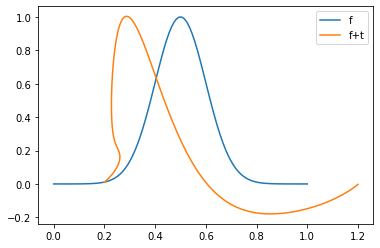

In [5]:
y = gaussian(x,0.5,0.1)
rep = FFT(x,y, dim=32)
rep.fit()
fig, ax = plt.subplots()
p0 = rep.transform([0],[0+0j])
ax.plot(np.real(p0), np.imag(p0), label='f')
pt = rep.transform([0,1],[0+0j, 20+1j])
ax.plot(np.real(pt), np.imag(pt), label='f+t')
ax.legend()
plt.show()

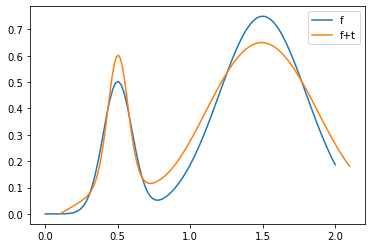

In [6]:
x = np.linspace(0,2, num=NUM_SAMPLES)
y0 = gaussian(x,0.5,0.1)
y1 = gaussian(x,1.5,0.3, c=1.5)
y = 0.5*(y0+y1)
rep = FFT(x,y, dim=64)
rep.fit()
fig, ax = plt.subplots()
p0 = rep.transform([0],[0+0j])
ax.plot(np.real(p0), np.imag(p0), label='f')
pt = rep.transform([1],[10+0j])
ax.plot(np.real(pt), np.imag(pt), label='f+t')
ax.legend()
plt.show()